In [91]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [27]:
#Reading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [30]:
#Check the number of missing values 
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
#Remove the rows with no customer ids
df.dropna(subset=['CustomerID'], inplace=True)

In [32]:
#Keeping only the rows with values greater than 0
new_df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [33]:
new_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [34]:
#Drop duplicates
new_df = new_df.drop_duplicates()

In [35]:
#Changing the data types
new_df['Quantity'] = new_df['Quantity'].astype(int)
new_df['UnitPrice'] = new_df['UnitPrice'].astype(float)
new_df['CustomerID'] = new_df['CustomerID'].astype(int, errors='ignore')

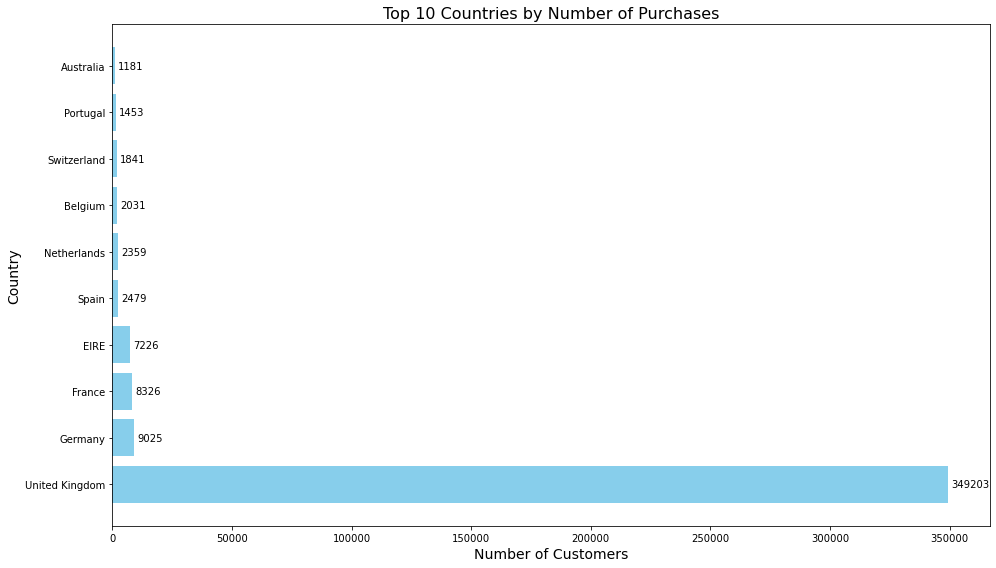

In [36]:
#Top Countries
top_countries = new_df['Country'].value_counts().nlargest(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
# plt.title('Top 10 Countries by Number of Purchases')
# plt.xlabel('Number of Purchases')
# plt.ylabel('Country')
# plt.show()

# Plot the Top 10 Countries using Matplotlib
fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.barh(top_countries.index, top_countries.values, color='skyblue')
ax.set_title('Top 10 Countries by Number of Purchases', fontsize=16)
ax.set_xlabel('Number of Customers', fontsize=14)
ax.set_ylabel('Country', fontsize=14)

# Adding labels
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), 
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords='offset points',
                ha='left', va='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

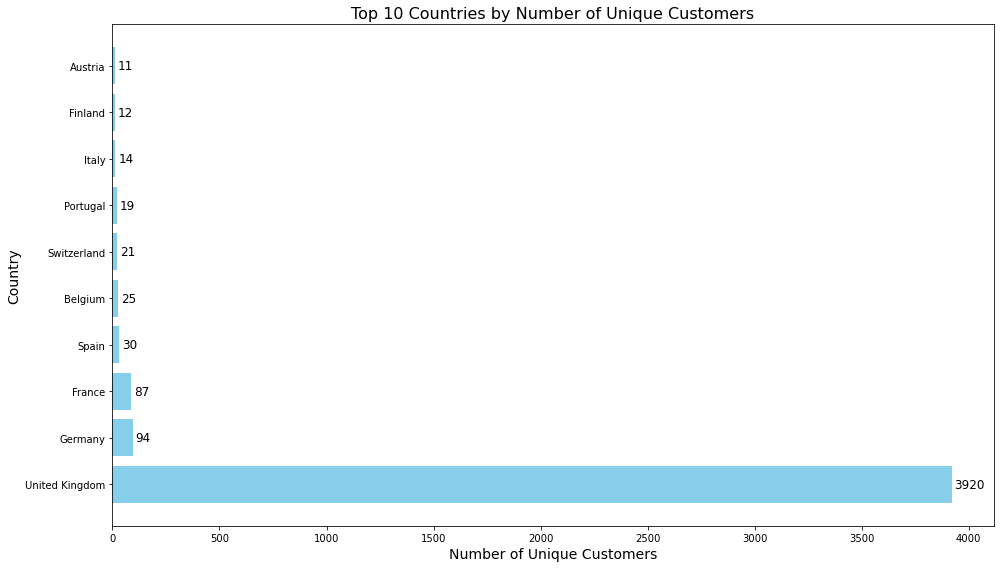

In [37]:
# Number of Customers per Country
customers_per_country = new_df.groupby('Country')['CustomerID'].nunique().nlargest(10)

# Plot the Top 10 Countries using Matplotlib
fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.barh(customers_per_country.index, customers_per_country.values, color='skyblue')
ax.set_title('Top 10 Countries by Number of Unique Customers', fontsize=16)
ax.set_xlabel('Number of Unique Customers', fontsize=14)
ax.set_ylabel('Country', fontsize=14)

# Adding labels
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), 
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords='offset points',
                ha='left', va='center', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [38]:
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


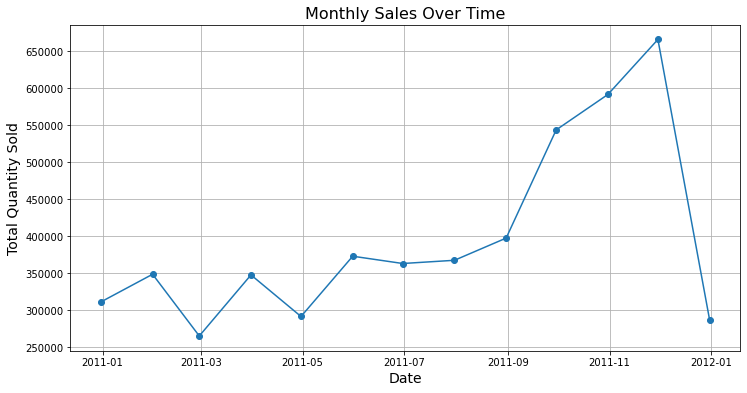

In [39]:
#Calculating monthly sales over time
new_df = new_df.reset_index()
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
new_df.set_index('InvoiceDate', inplace=True)
sales_over_time = new_df['Quantity'].resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.grid(True)
plt.show()

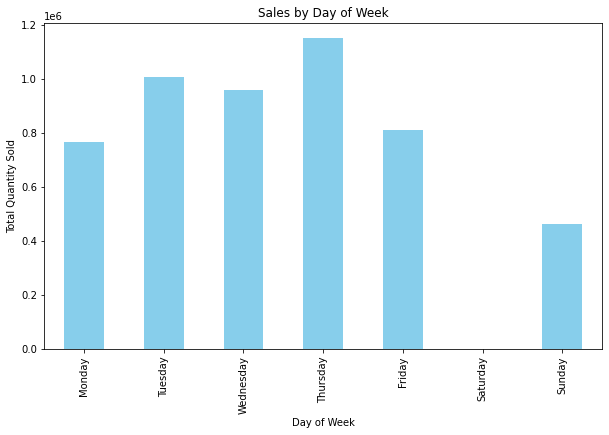

In [40]:
#Calculating sales by day of the week
new_df = new_df.reset_index()
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
# print(new_df)
new_df['DayOfWeek'] = new_df['InvoiceDate'].dt.day_name()
new_df.set_index('InvoiceDate', inplace=True)
sales_by_day = new_df.groupby('DayOfWeek')['Quantity'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.show()

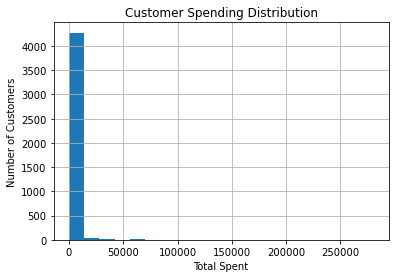

In [41]:
#Customer Spending Distribution: total spending per customer.
new_df = new_df.reset_index()
new_df['TotalSpent'] = new_df['Quantity'] * new_df['UnitPrice']
spending_per_customer = new_df.groupby('CustomerID')['TotalSpent'].sum()
spending_per_customer.hist(bins=20)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.show()

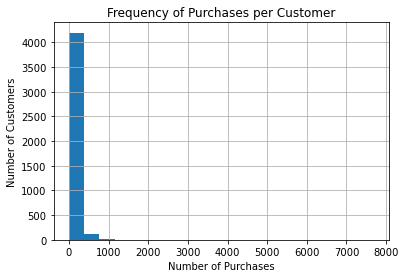

In [42]:
#Frequency of Purchases per Customer:
purchase_freq = new_df['CustomerID'].value_counts()
purchase_freq.hist(bins=20)
plt.title('Frequency of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

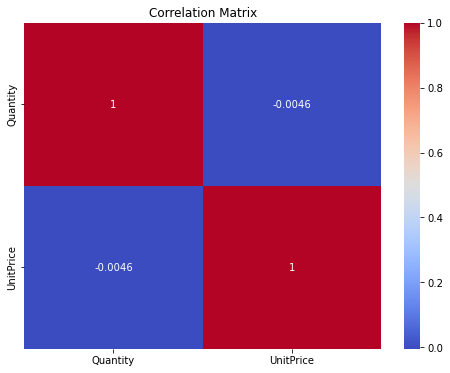

In [43]:
#Correlation matrix
corr_matrix = new_df[['Quantity', 'UnitPrice']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
#Calculate the recent purchases
new_df['rank'] = new_df.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)
df_recent = new_df[new_df['rank']==1]
df_recent['recent_customers'] = (df_recent['InvoiceDate'] - pd.to_datetime(min(df_recent['InvoiceDate']))).dt.days

C:\Users\Simran Yesukumar\AppData\Local\Temp\ipykernel_21856\288962924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['recent_customers'] = (df_recent['InvoiceDate'] - pd.to_datetime(min(df_recent['InvoiceDate']))).dt.days


In [45]:
#Number of times the customer has made the purchase
frequent_ones = df_recent.groupby('CustomerID')['InvoiceDate'].count()
df_frequent_ones = pd.DataFrame(frequent_ones).reset_index()
df_frequent_ones.columns = ['CustomerID','frequent']
recent_frequent_ones = df_frequent_ones.merge(df_recent,on='CustomerID')

In [46]:
recent_frequent_ones.head()

,CustomerID,frequent,InvoiceDate,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,DayOfWeek,TotalSpent,rank,recent_customers
0,12346,1,2011-01-18 10:01:00,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,United Kingdom,Tuesday,77183.6,1,48
1,12347,31,2010-12-07 14:57:00,14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2.10,Iceland,Tuesday,25.2,1,6
2,12347,31,2010-12-07 14:57:00,14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,4.25,Iceland,Tuesday,17.0,1,6
3,12347,31,2010-12-07 14:57:00,14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,3.25,Iceland,Tuesday,39.0,1,6
4,12347,31,2010-12-07 14:57:00,14941,537626,22492,MINI PAINT SET VINTAGE,36,0.65,Iceland,Tuesday,23.4,1,6


In [47]:
#Total amount spent by the customer
recent_frequent_ones['total'] = recent_frequent_ones['Quantity']*new_df['UnitPrice']
total_amount_spent = recent_frequent_ones.groupby('CustomerID')['total'].sum()
total_amount_spent = pd.DataFrame(total_amount_spent).reset_index()
total_amount_spent.columns = ['CustomerID','Total Amount Spent']
recent_frequent_total_amount= total_amount_spent.merge(recent_frequent_ones,on='CustomerID')

In [48]:
recent_frequent_total_amount.head()

,CustomerID,Total Amount Spent,frequent,InvoiceDate,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,DayOfWeek,TotalSpent,rank,recent_customers,total
0,12346,189248.25,1,2011-01-18 10:01:00,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,United Kingdom,Tuesday,77183.6,1,48,189248.25
1,12347,1246.73,31,2010-12-07 14:57:00,14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2.10,Iceland,Tuesday,25.2,1,6,40.68
2,12347,1246.73,31,2010-12-07 14:57:00,14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,4.25,Iceland,Tuesday,17.0,1,6,11.00
3,12347,1246.73,31,2010-12-07 14:57:00,14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,3.25,Iceland,Tuesday,39.0,1,6,40.68
4,12347,1246.73,31,2010-12-07 14:57:00,14941,537626,22492,MINI PAINT SET VINTAGE,36,0.65,Iceland,Tuesday,23.4,1,6,122.04


In [49]:
recent_frequent_total_amount.columns

Index(['CustomerID', 'Total Amount Spent', 'frequent', 'InvoiceDate', 'index',
       'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Country', 'DayOfWeek', 'TotalSpent', 'rank', 'recent_customers',
       'total'],
      dtype='object')

In [50]:
model_data = recent_frequent_total_amount[['CustomerID', 'Total Amount Spent', 'frequent','recent_customers']]

In [51]:
model_data.head(2)

,CustomerID,Total Amount Spent,frequent,recent_customers
0,12346,189248.25,1,48
1,12347,1246.73,31,6


In [52]:
#Standardization of the values
from sklearn.preprocessing import StandardScaler
model_data = model_data.drop_duplicates()
col_names = ['Total Amount Spent', 'frequent','recent_customers']
features = model_data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [53]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Assuming model_data is already loaded and contains valid data
# # model_data = pd.read_csv('your_data.csv')  # Replace with your data loading logic

# # Drop duplicates if any
# model_data = model_data.drop_duplicates()

# # Check if model_data is properly initialized and not None
# if model_data is not None and not model_data.empty:
#     col_names = ['recent_customers', 'frequency', 'monetary_value']
#     features = model_data[col_names]
    
#     # Initialize StandardScaler and fit-transform
#     scaler = StandardScaler()
#     scaled_features = scaler.fit_transform(features)
    
#     # Convert scaled_features array back to DataFrame with column names
#     scaled_features_df = pd.DataFrame(scaled_features, columns=col_names)
    
#     # Optionally, you can assign scaled_features_df back to model_data or use it for further analysis
    
#     print("Standard scaling completed successfully.")
# else:
#     print("Error: model_data is None or empty. Please check your data loading process.")

In [58]:
kmeans_algo = KMeans(n_clusters=4, n_init=10, random_state=42)
model_data['Cluster'] = kmeans_algo.fit_predict(scaled_features)

In [59]:
silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')

0.3652204356550734

In [60]:
# # Now that we have built our segmentation model, we need to assign clusters to each customer in the dataset:
# pred = kmeans.predict(scaled_features)
# frame = pd.DataFrame(model_data)
# frame['cluster'] = pred
model_data.head()

,CustomerID,Total Amount Spent,frequent,recent_customers,Cluster
0,12346,189248.25,1,48,3
1,12347,1246.73,31,6,0
32,12348,4311.90,17,15,0
49,12349,1618.81,73,355,1
122,12350,553.25,17,63,0


In [62]:
# custom bin for Recent, Frequent ones, and Total amount spent
recent_bins = [model_data['recent_customers'].min()-1, 20, 50, 150, 250, model_data['recent_customers'].max()]
frequent_bins = [model_data['frequent'].min() - 1, 2, 3, 10, 100, model_data['frequent'].max()]
total_spent_bins = [model_data['Total Amount Spent'].min() - 3, 300, 600, 2000, 5000, model_data['Total Amount Spent'].max()]
model_data['R_Score'] = pd.cut(model_data['recent_customers'], bins=recent_bins, labels=range(1, 6), include_lowest=True)
model_data['R_Score'] = 5 - model_data['R_Score'].astype(int) + 1
model_data['F_Score'] = pd.cut(model_data['frequent'], bins=frequent_bins, labels=range(1, 6), include_lowest=True).astype(int)
model_data['M_Score'] = pd.cut(model_data['Total Amount Spent'], bins=total_spent_bins, labels=range(1, 6), include_lowest=True).astype(int)

In [63]:
model_data.head(2)

,CustomerID,Total Amount Spent,frequent,recent_customers,Cluster,R_Score,F_Score,M_Score
0,12346,189248.25,1,48,3,4,1,5
1,12347,1246.73,31,6,0,5,4,3


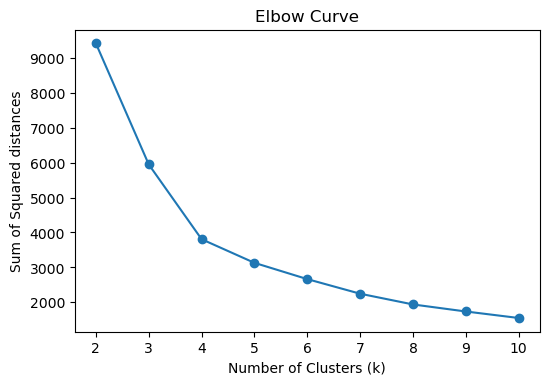

In [64]:
X = model_data[['R_Score', 'F_Score', 'M_Score']]
cluster_ranges = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(scaled_features)
    cluster_ranges.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 4),dpi=100)
plt.plot(range(2, 11), cluster_ranges, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared distances')
plt.title('Elbow Curve')
plt.show()

In [65]:
kmeans_algo = KMeans(n_clusters=4, n_init=10, random_state=42)
model_data['Cluster'] = kmeans_algo.fit_predict(X)

In [66]:
# Group by cluster
cluster_avg = model_data.groupby('Cluster').agg({'R_Score': 'mean','F_Score': 'mean','M_Score': 'mean'}).reset_index()

In [67]:
cluster_avg

,Cluster,R_Score,F_Score,M_Score
0,0,2.547790,2.892086,1.130524
1,1,2.828696,3.926957,2.954783
2,2,1.121061,3.834992,2.203980
3,3,4.855302,3.494549,1.888999


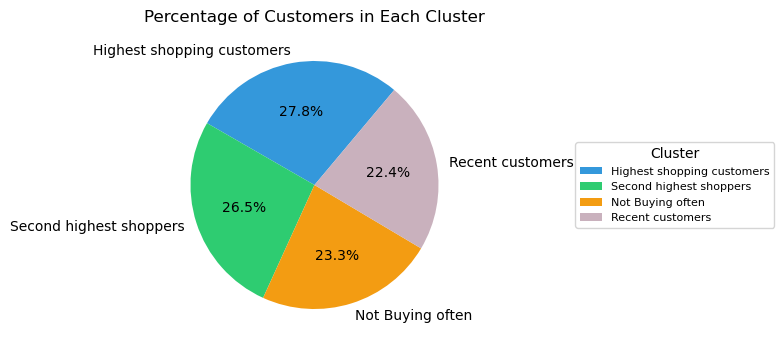

In [90]:
# Count the number of customers in each cluster
cluster_count = model_data['Cluster'].value_counts()
# colors and labels for the pie chart
colors = ['#3498db', '#2ecc71', '#f39c12', '#C9B1BD']
labels = ['Highest shopping customers', 'Second highest shoppers', 'Not Buying often', 'Recent customers']
# total, percentage of customers in each cluster
total_cust = cluster_count.sum()
percentage_cust = (cluster_counts / total_cust) * 100
# Output the total and percentage of customers
# print(f"Total Customers: {total_customers}")
# print(f"Percentage of Customers in Each Cluster:\n{percentage_customers}")
# Create and display the pie chart
plt.figure(figsize=(4,6), dpi=100)
plt.pie(percentage_cust, labels=labels, autopct='%1.1f%%', startangle=50, colors=colors)
plt.title('% of Customers in Each Cluster')
plt.legend(labels, title='Cluster',loc="right",prop={'size': 8},bbox_to_anchor=(2, 0.5))
plt.show()